# Removing Noise from a signal

- Our goal is to remove the noise added to the two tone telephones sinusoids
- By taking the fourier transform of the signal
- Find the main frequencies 
- Use a rect filter and take an ifft of the smooth signal

### Load and play the original audio

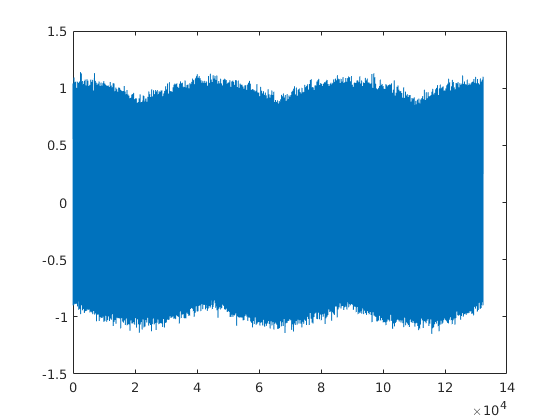

In [11]:
load('./q2.mat')
audio_x = audioplayer(X,41400);
play(audio_x);
plot(X);

### Compute the fourier transform and plot it.

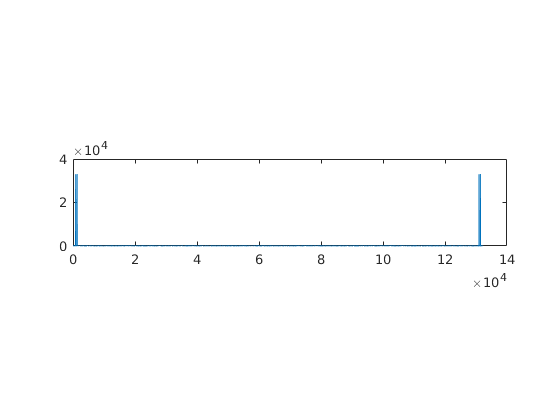

In [2]:
f_x = fft(X);
plot(abs(f_x));
pbaspect([5 1 1]);

### We notice 4 peaks in the plot  

In [3]:
[val,f] = sort(abs(f_x));
val(end-4:end),f(end-4:end) 


ans =

   1.0e+04 *

    0.0339
    3.3068
    3.3068
    3.3082
    3.3082


ans =

      130981
        1321
      130982
         882
      131421



### Multiply with a rect function for bandwidth 700-1400 , 11000-end to remove noise

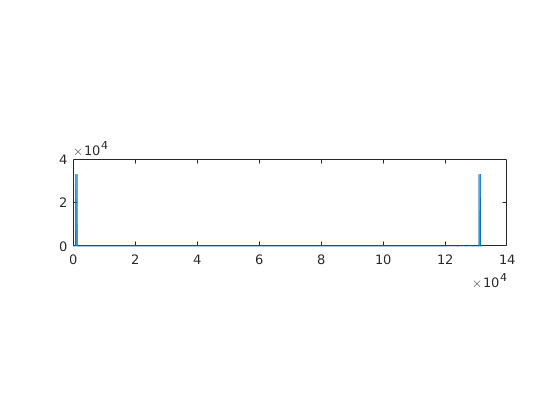

In [5]:
rect = zeros(size(f_x));
rect(700:1400) = 1;
rect(end-12000:end) = 1;
plot(abs(f_x.*rect));
pbaspect([5 1 1])

### Do inverse fourier transform

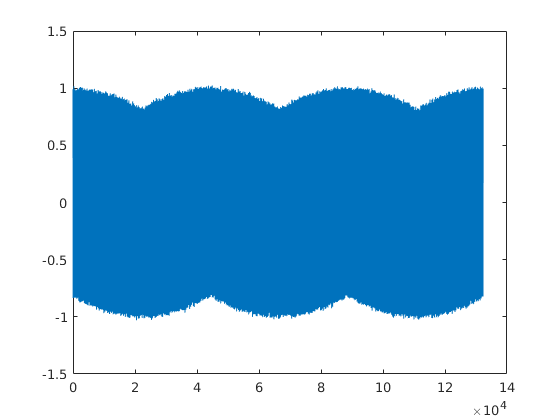

In [6]:
y = ifft(f_x.*rect);
plot(real(y));

### Convert to audio

In [12]:
audio_r = audioplayer(real(y),Fs);
audiowrite('result.wav',real(y),Fs);
play(audio_r);

> In audiowrite>clipInputData (line 396)
  In audiowrite (line 176)
